In [ ]:
#!pip install seaborn --upgrade

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [ ]:
#importação de dados
url_filmes = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'
filmes = pd.read_csv(url_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#Cria colunas com generos
generos  = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()
generos_escaldos = scaler.fit_transform(generos)
generos_escaldos

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [ ]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escaldos)

modelo.labels_

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.031634,0.874626,2.284818,2.503361,0.229725,-0.313560,-0.202235,-0.588077,0.853674,-0.094926,-0.277834,0.205995,0.386109,-0.133296,-0.274303,0.121945,-0.472581,-0.169377,-0.083254
1,0.038224,-0.269869,-0.211424,-0.252408,-0.270451,0.253720,-0.158641,0.137219,0.181896,-0.144073,-0.076967,-0.277837,-0.113684,0.024206,-0.186797,0.211943,-0.261979,-0.471194,0.096535,0.041045
2,-0.059180,0.565825,0.147132,-0.232865,-0.267692,-0.597815,0.429742,-0.215815,-0.180715,0.015417,0.189661,0.663291,0.166141,-0.176954,0.428332,-0.345871,0.499016,1.125360,-0.142904,-0.057060


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff26fd62fd0>,
      dtype=object)

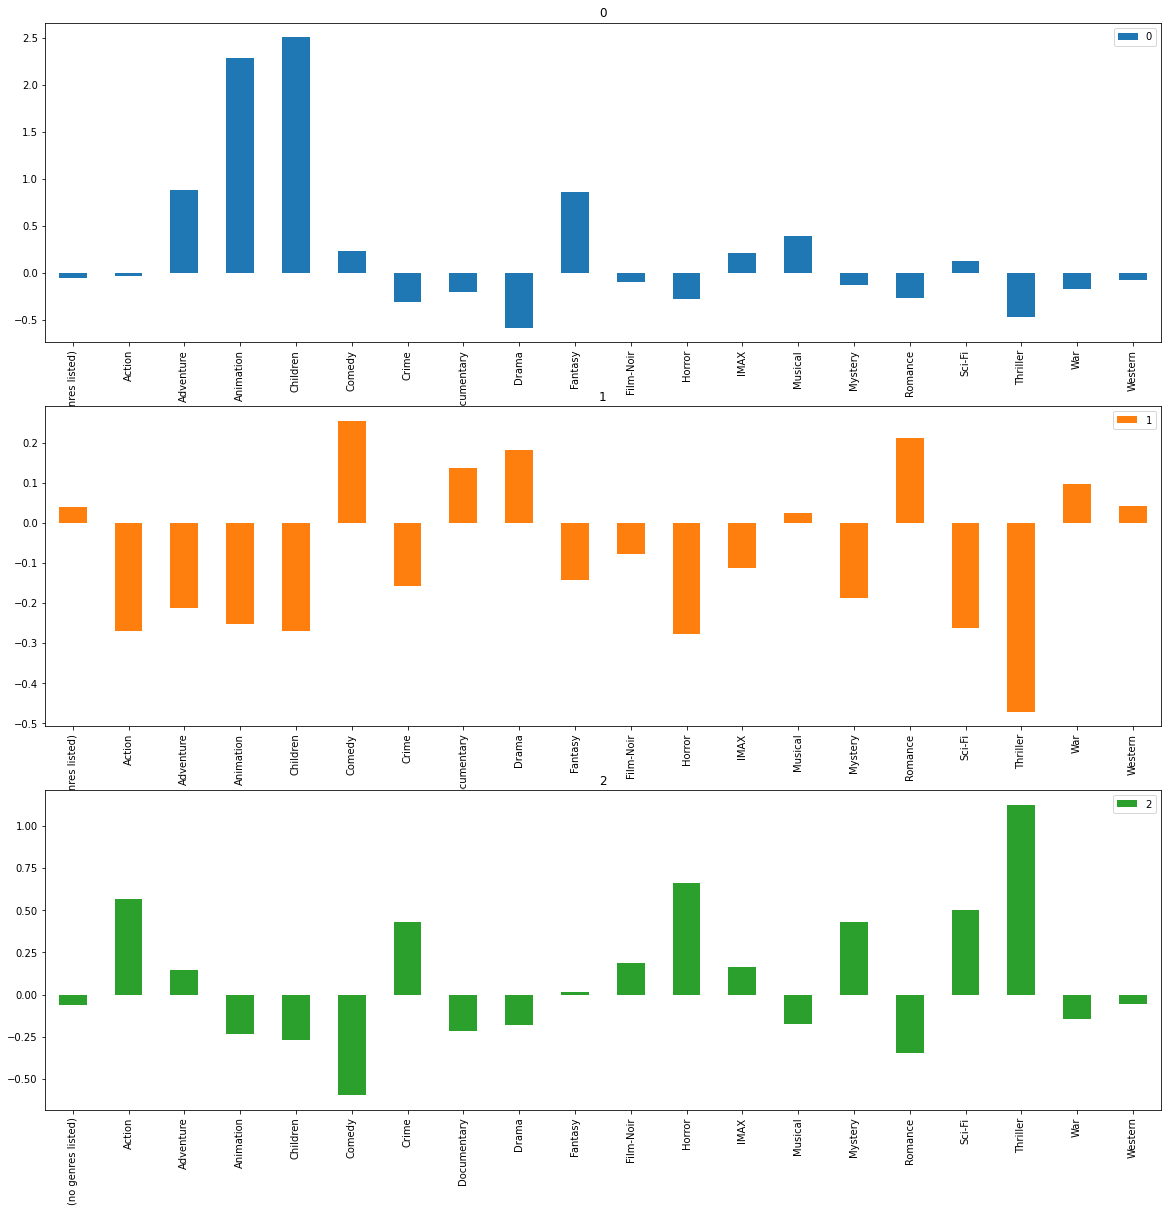

In [ ]:
grupos.transpose().plot.bar(subplots=True,
                            figsize=(20,20),
                            sharex=False)

In [ ]:
dados, _ = make_blobs(n_samples=9742, n_features=2, random_state=7)
dados = pd.DataFrame(dados, columns=["coluna_1","coluna_2"])
dados.head()

,coluna_1,coluna_2
0,9.763012,1.011105
1,8.777366,1.441515
2,-2.115411,4.886707
3,8.610486,-0.100920
4,-7.880706,5.298548


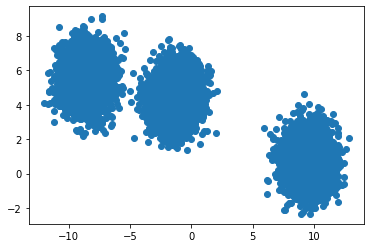

In [ ]:
plt.scatter(x=dados.coluna_1, y=dados.coluna_2)

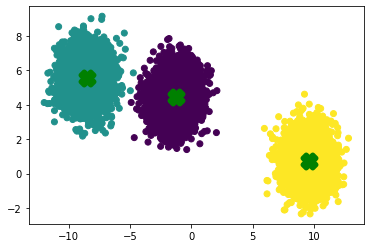

In [ ]:
grupos_ = modelo.fit_predict(dados)
centroides = modelo.cluster_centers_

plt.scatter(x=dados.coluna_1,
            y=dados.coluna_2,
            c= grupos_,
            cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

In [ ]:
tnse = TSNE()

visualizacao = tnse.fit_transform(generos_escaldos)
visualizacao

array([[-45.66631  ,  15.106807 ],
       [ 29.031927 ,  46.57076  ],
       [ 13.202528 , -27.740389 ],
       ...,
       [ 18.895115 ,   2.7530732],
       [-37.034702 ,  -8.478878 ],
       [-11.895316 , -17.84946  ]], dtype=float32)

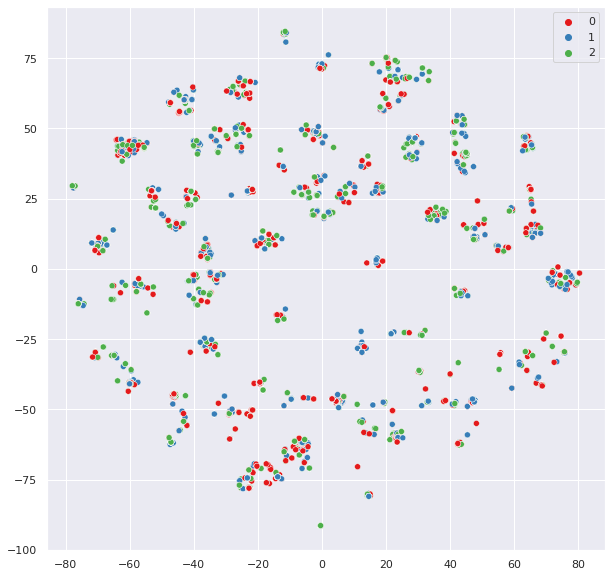

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue = modelo.labels_,
                palette = sns.color_palette('Set1',3))

In [ ]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return[numero_de_clusters, modelo.inertia_]

In [ ]:
resultado = [kmeans(numero_de_clusters, generos_escaldos) for numero_de_clusters in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179528.16927707611],
 [3, 166284.16187814216],
 [4, 155680.05542167474],
 [5, 147162.09191611098],
 [6, 137282.86263012388],
 [7, 127577.81301413759],
 [8, 118805.53660555433],
 [9, 109299.13436707076],
 [10, 103046.21336428354],
 [11, 94847.13161812356],
 [12, 86005.09418858694],
 [13, 78444.77867180906],
 [14, 74391.9265321901],
 [15, 69825.24744178947],
 [16, 65216.16024867138],
 [17, 61358.5296091552],
 [18, 58625.175719031715],
 [19, 56381.17287806486],
 [20, 55410.91419204713],
 [21, 54314.04989486272],
 [22, 52390.141572219756],
 [23, 51219.189085993225],
 [24, 48717.97358580935],
 [25, 47819.62296128606],
 [26, 46671.90548072995],
 [27, 45591.603838175324],
 [28, 44227.6150753286],
 [29, 43143.25994662963],
 [30, 43042.9707914414],
 [31, 41434.25137697719],
 [32, 40748.52102805011],
 [33, 40540.841069877366],
 [34, 39850.56739310223],
 [35, 38999.87383069875],
 [36, 37630.116601488],
 [37, 37817.24740677823],
 [38, 36672.20801219526],
 [39, 36346.1306254452

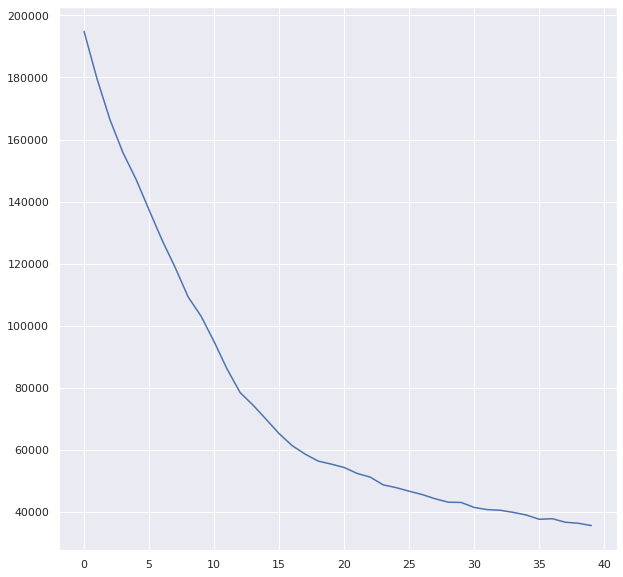

In [ ]:
resultado = pd.DataFrame(resultado,
                         columns = ['grupos', 'inertia'])

resultado.inertia.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff264d92250>,
      dtype=object)

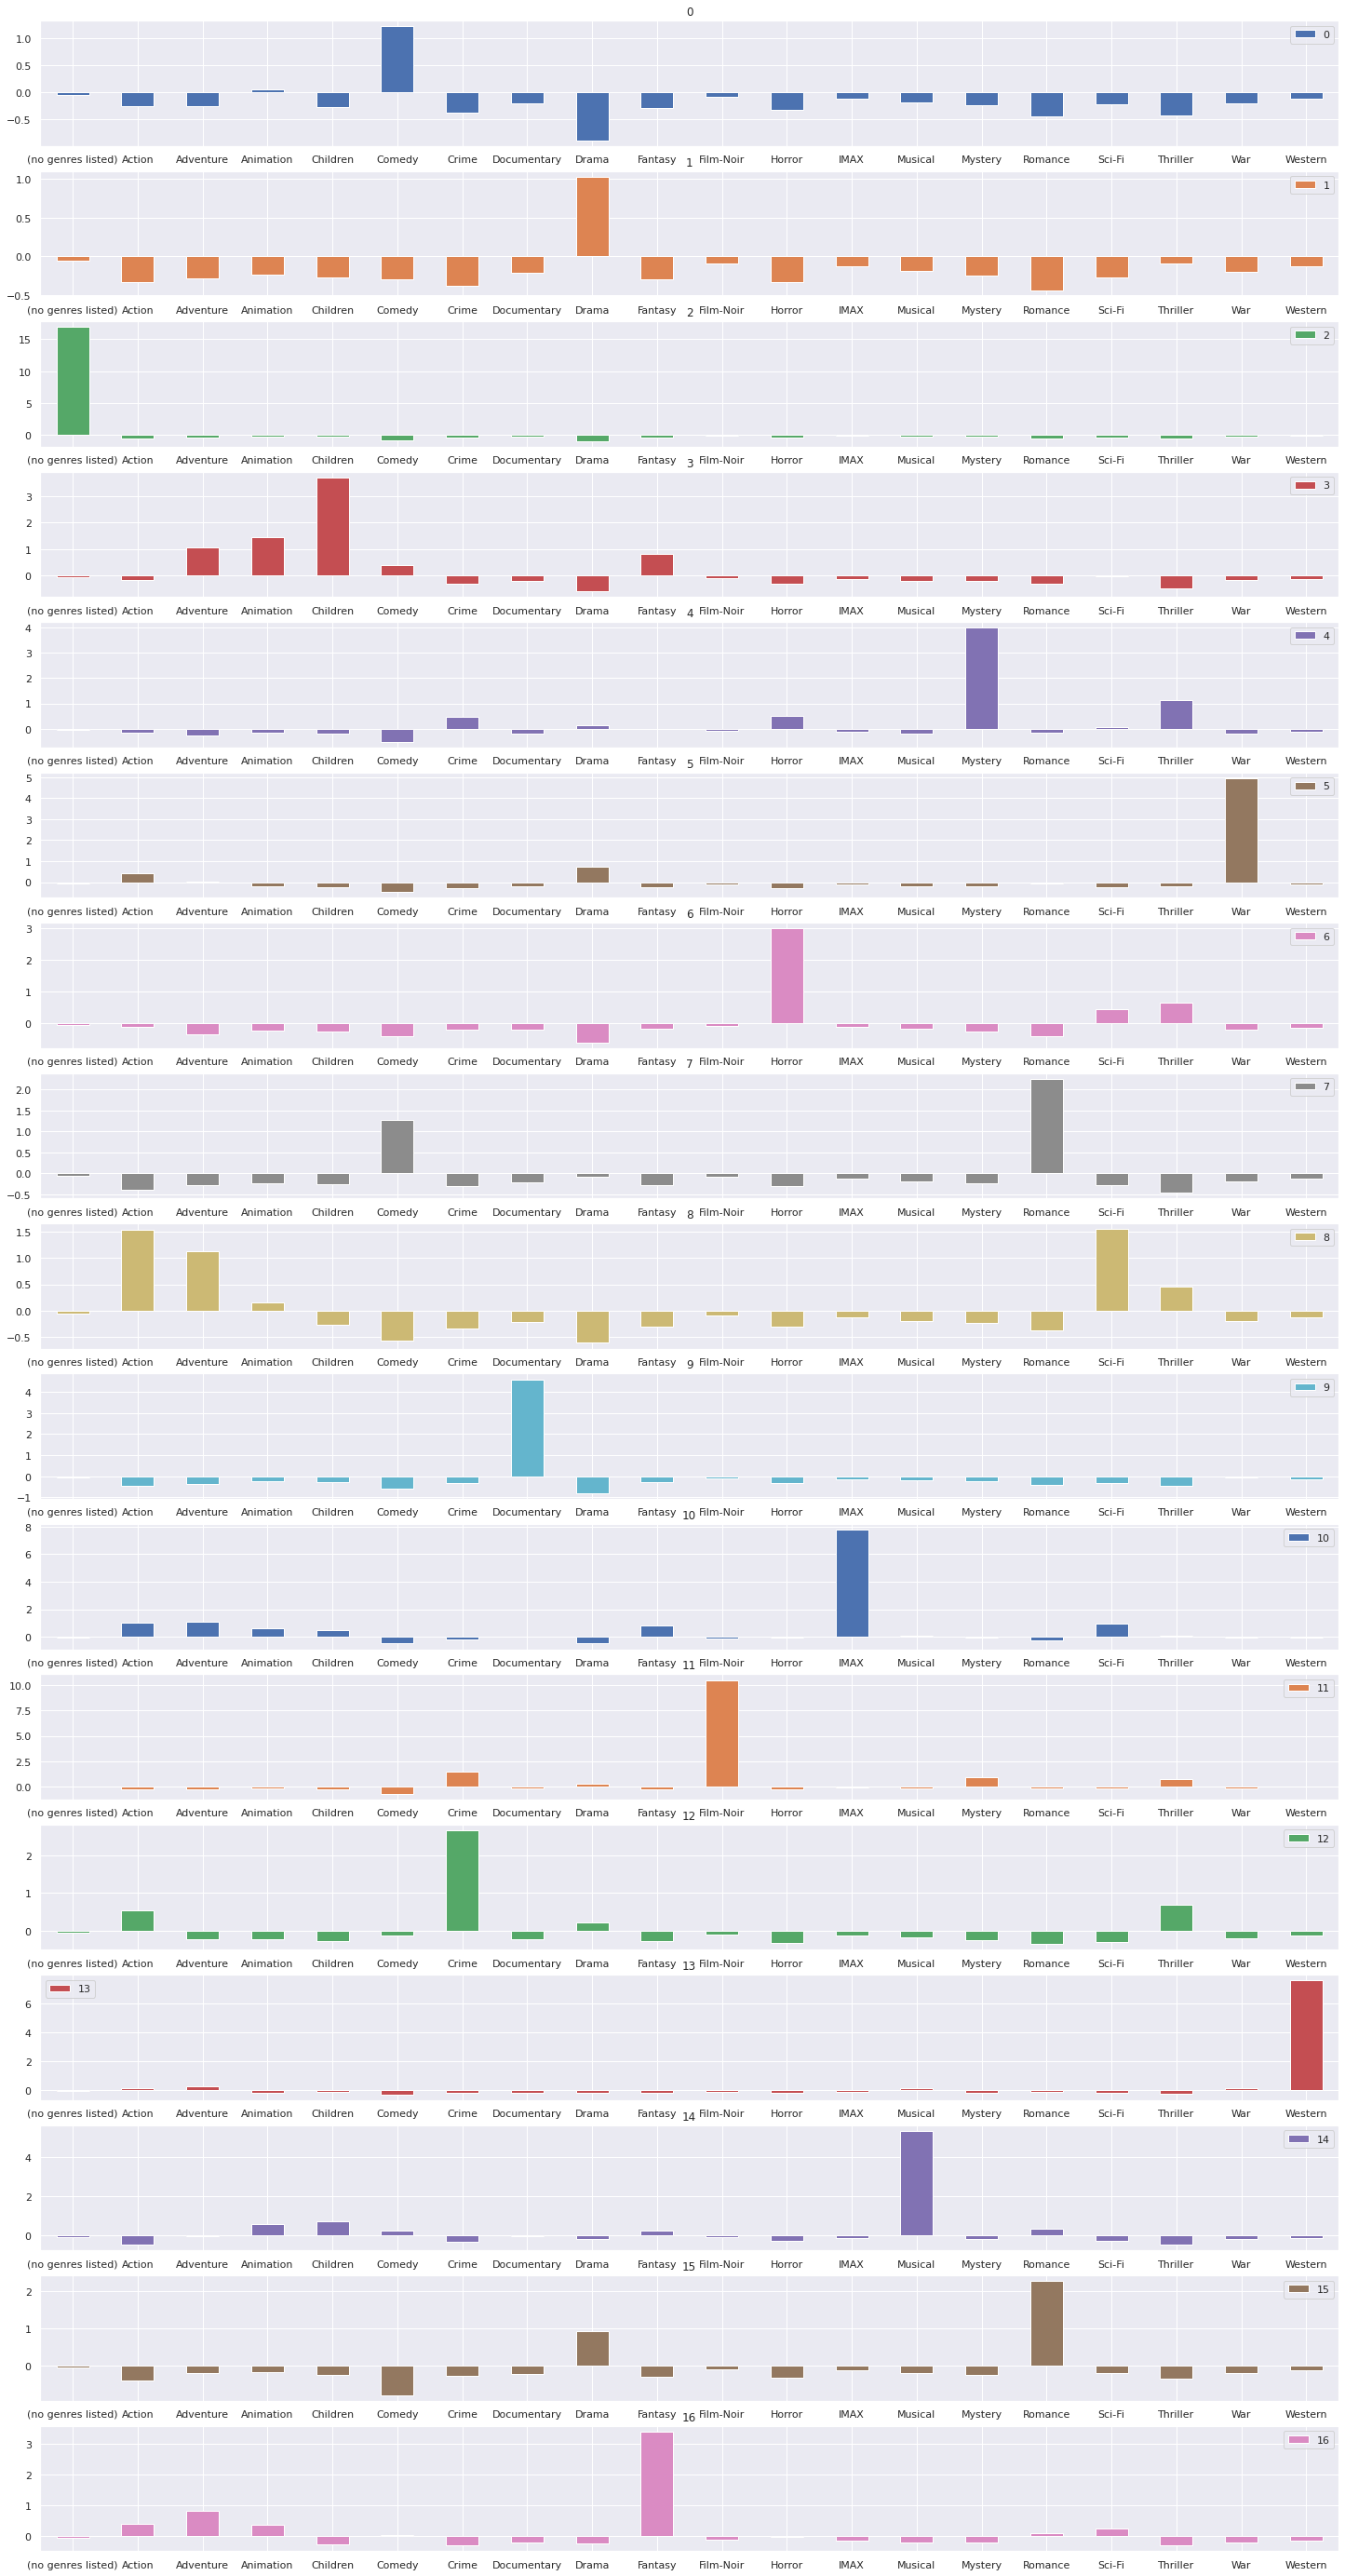

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escaldos)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [ ]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escaldos)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [ ]:
visualizacao = tnse.fit_transform(generos_escaldos)
visualizacao

array([[  5.2566915 ,  59.93528   ],
       [ 45.02862   ,  -4.4989614 ],
       [-34.794453  ,   0.51542825],
       ...,
       [ -7.0678897 ,  -5.5845437 ],
       [-31.764675  , -25.30302   ],
       [ 27.457598  ,  10.001544  ]], dtype=float32)

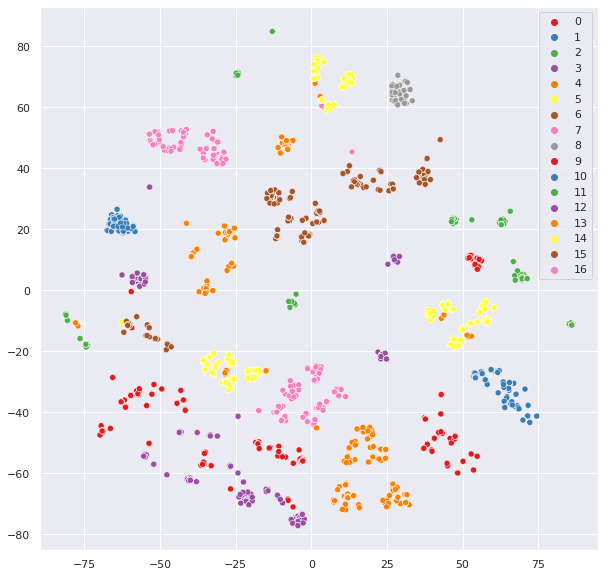

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue = grupos,
                palette = sns.color_palette('Set1',17))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff26442c490>,
      dtype=object)

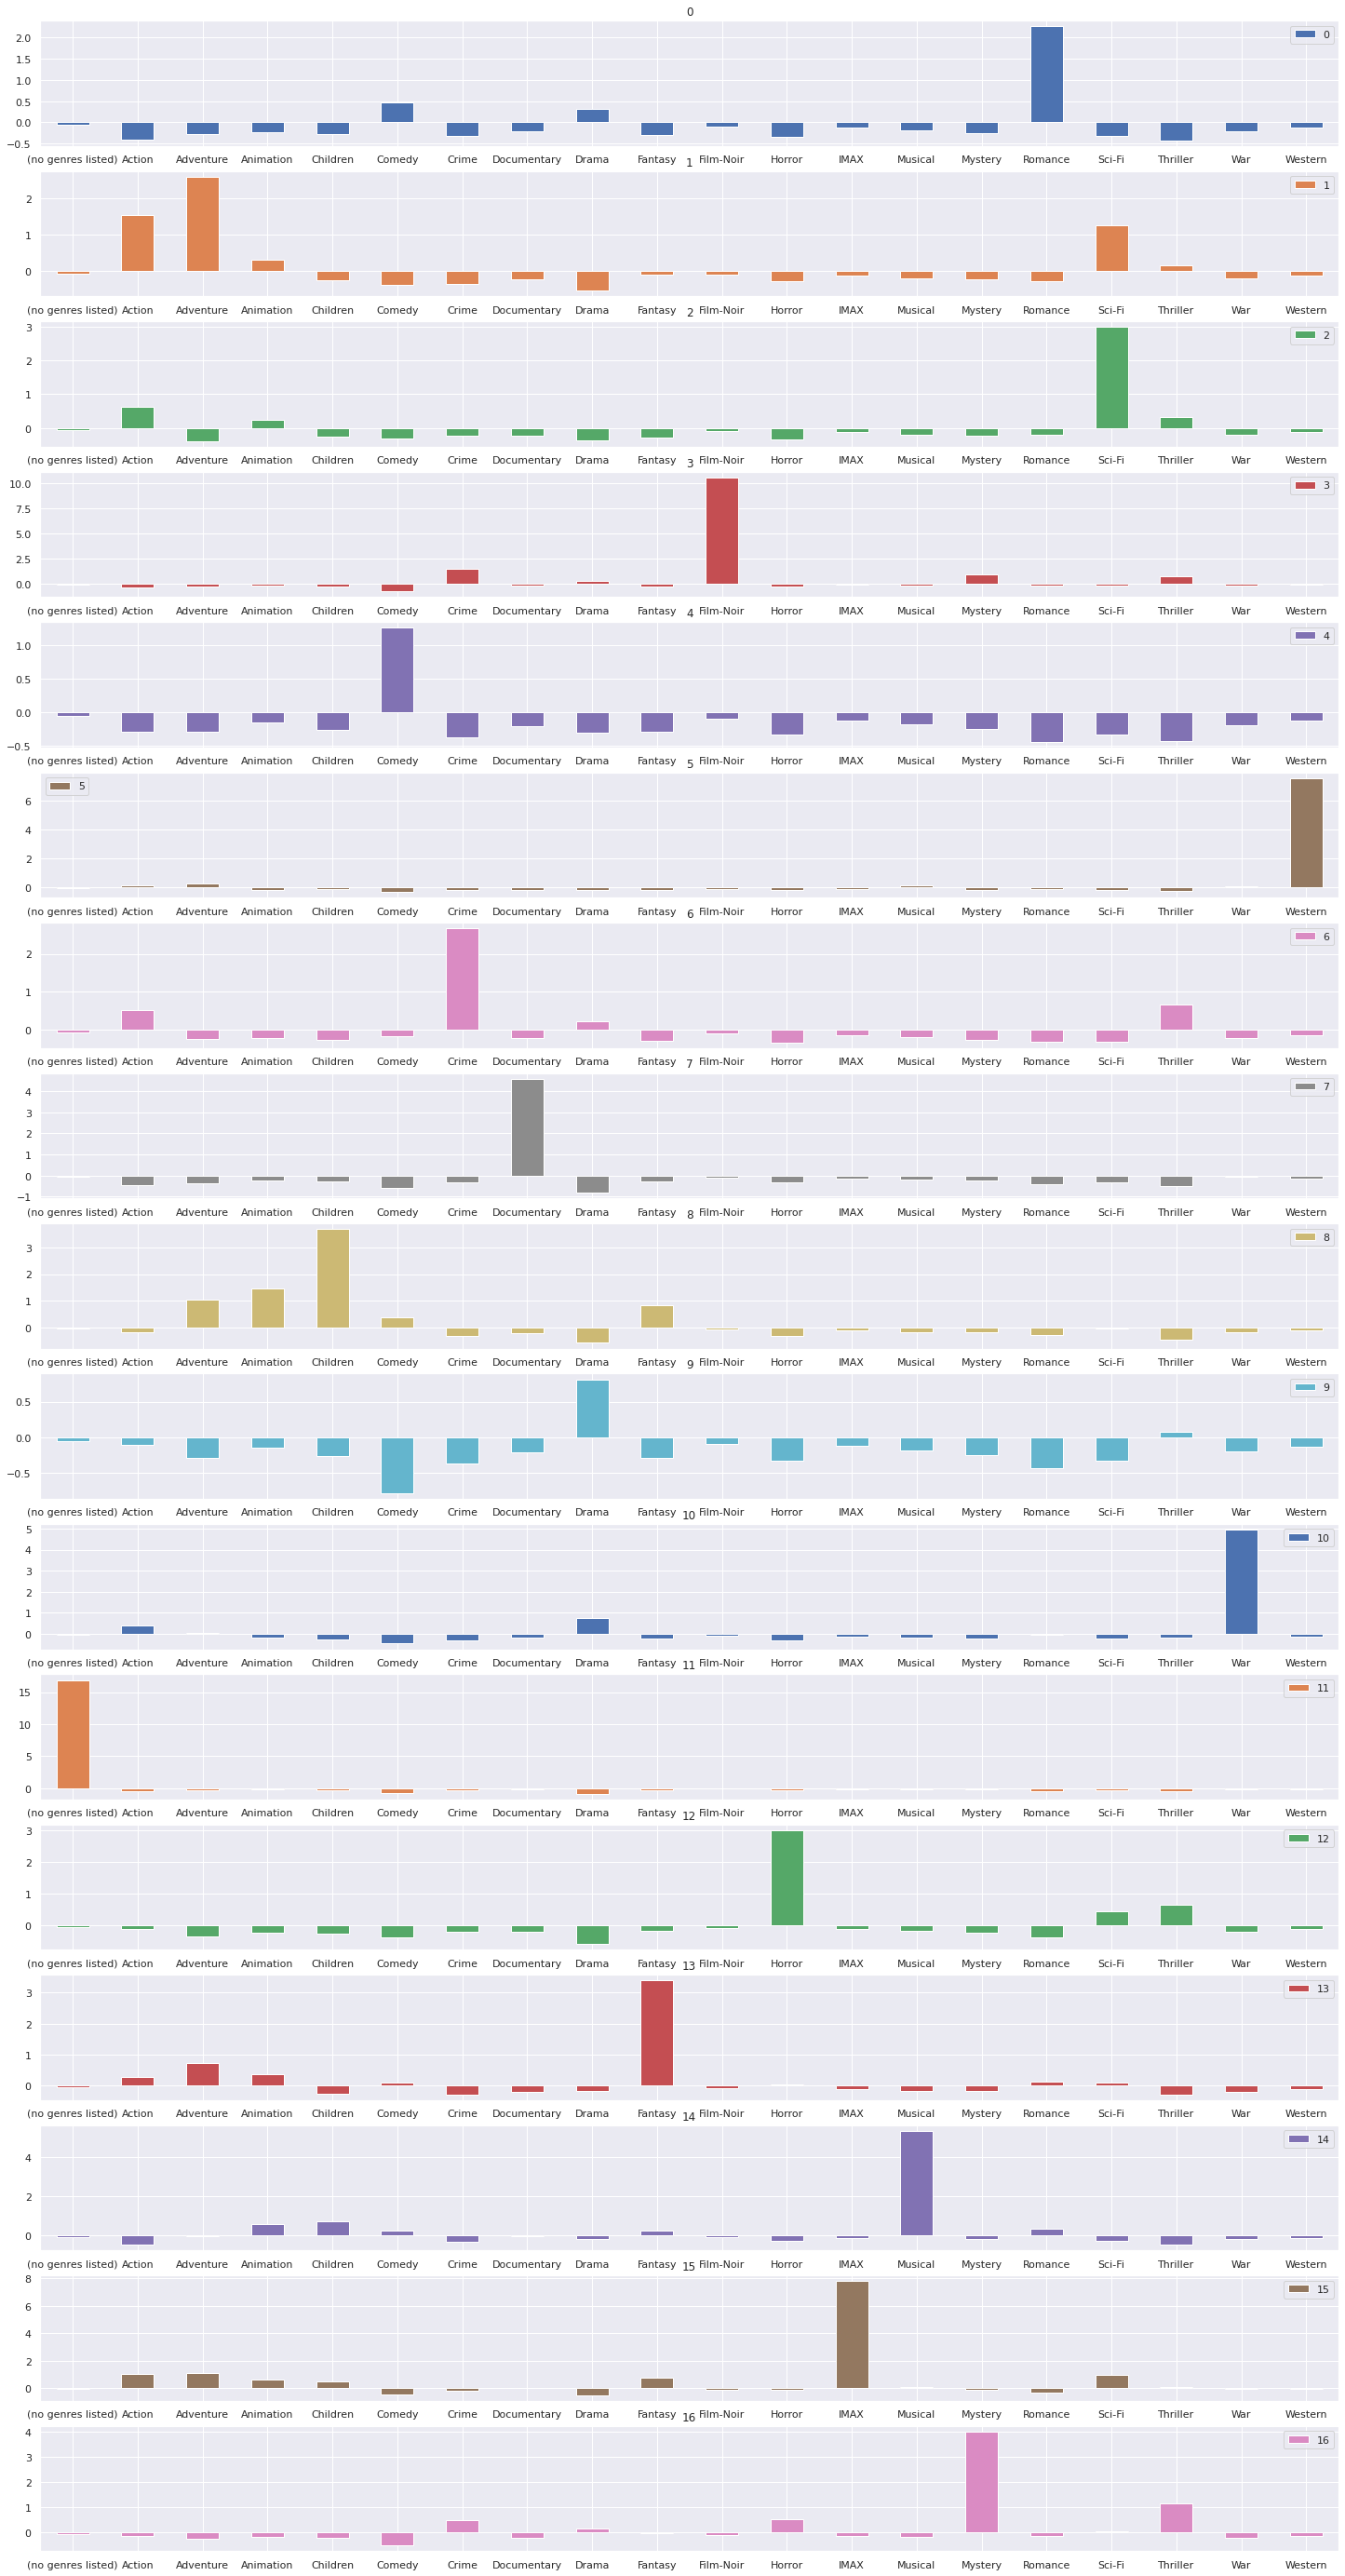

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escaldos)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [ ]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 4.        ,  9.        ,  2.40310725,  2.        ],
       [ 0.        , 17.        ,  2.88496689,  3.        ],
       [ 6.        , 18.        ,  3.28210427,  4.        ],
       [ 1.        ,  2.        ,  3.57813295,  2.        ],
       [19.        , 20.        ,  3.67748685,  6.        ],
       [12.        , 21.        ,  3.76762979,  7.        ],
       [13.        , 22.        ,  4.16189588,  8.        ],
       [16.        , 23.        ,  4.64300086,  9.        ],
       [ 8.        , 24.        ,  4.73420953, 10.        ],
       [ 7.        , 25.        ,  5.13004999, 11.        ],
       [10.        , 26.        ,  5.22274573, 12.        ],
       [14.        , 27.        ,  5.814875  , 13.        ],
       [ 5.        , 28.        ,  7.84177999, 14.        ],
       [15.        , 29.        ,  8.17986299, 15.        ],
       [ 3.        , 30.        , 10.81544145, 16.        ],
       [11.        , 31.        , 17.05736836, 17.        ]])

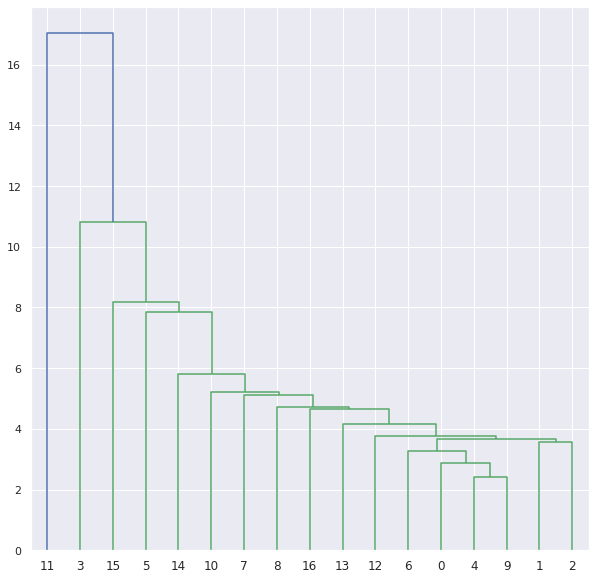

In [ ]:
dendrograma = dendrogram(matriz_de_distancia)